In [1]:
import os
import mne
from mne.io import read_raw_egi
import mypy

# włączam tryb inline aby wszystko było widoczne w notebooku,
# a nie wyskakiwało w oddzielnym okienku, w ten sposób jednak
# wykresy nie będą interaktywne. Jeżeli chcecie interaktywne
# wykresy zamianst "%matplotlib inline" piszcie "%matplotlib"
%matplotlib inline

In [2]:
pth = r'C:\Users\swps\Dropbox\DANE\CAT N170\EEG\RAW'
fls = [f for f in os.listdir(pth) if f.endswith('.raw')]
fname = os.path.join(pth, fls[4])

### Wczytujemy plik, eventy, wyświetlamy

In [3]:
eeg = read_raw_egi(fname, preload=True, verbose=False) # aby nie było za dużo tekstu
eeg

<RawEGI  |  CAT110 20131108 2040002.raw, n_channels x n_times : 73 x 177499 (710.0 sec), ~99.0 MB, data loaded>

In [4]:
events = mypy.events.get_events_from_din(eeg)
events[:3, :]

array([[ 877,    0,    2],
       [ 881,    0,  192],
       [1265,    0,  128]])

In [5]:
# dinowe kanały są już nam niepotrzebne:
drop_chan = [ch for ch in eeg.ch_names if ch.startswith('D')]
print(drop_chan)
eeg.drop_channels(drop_chan)

['D128', 'DI16', 'DI32', 'DI64', 'DIN1', 'DIN2', 'DIN4', 'DIN8']


<RawEGI  |  CAT110 20131108 2040002.raw, n_channels x n_times : 65 x 177499 (710.0 sec), ~88.1 MB, data loaded>

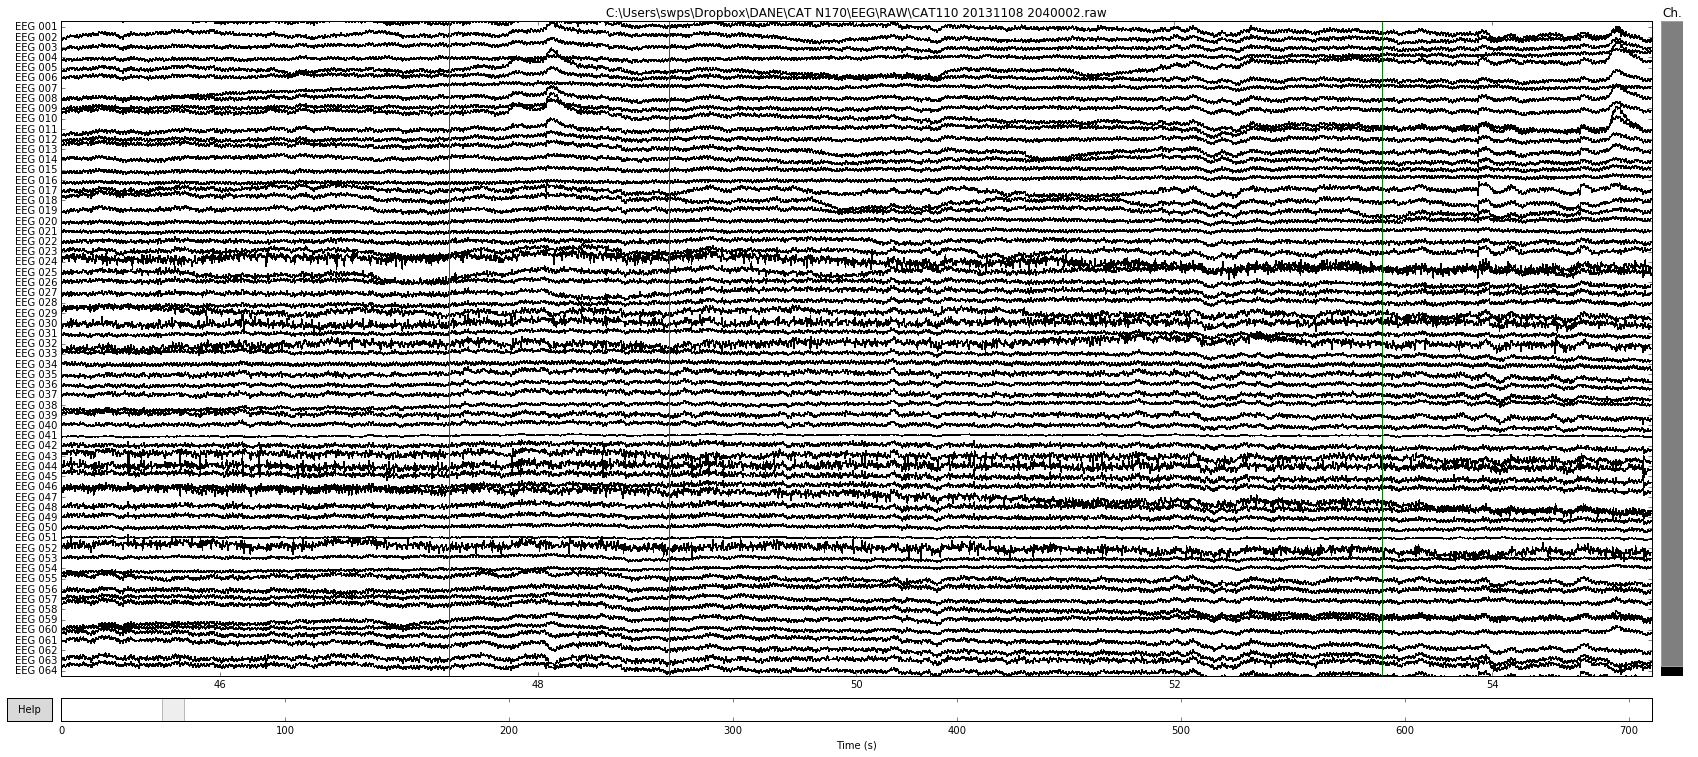

In [6]:
# możemy wyświetlać eventy i ich kolory w plotterze sygnału
kolory = {36: 'green', 52: 'red'}
eeg.plot(n_channels=64, events=events, event_color=kolory, scalings={'eeg':0.000042}, start=45.);

### Dodajemy montaż

In [9]:
mntg = mne.channels.read_montage('GSN-HydroCel-65_1.0')
mypy.events.correct_egi_channel_names(eeg)
eeg.set_montage(mntg)

## Filtrujemy i ustawiamy referencję

In [10]:
eeg.filter(1., 40)
eeg.set_eeg_reference()
eeg.apply_proj()

Multiple deprecated filter parameters were used:
phase in 0.13 is "zero-double" but will change to "zero" in 0.14
fir_window in 0.13 is "hann" but will change to "hamming" in 0.14
lower transition bandwidth in 0.13 is 0.5 Hz but will change to "auto" in 0.14
upper transition bandwidth in 0.13 is 0.5 Hz but will change to "auto" in 0.14
The default filter length in 0.13 is "10s" but will change to "auto" in 0.14


<ipython-input-10-921a4c97aabe>:1: DeprecationWarning: Multiple deprecated filter parameters were used:
phase in 0.13 is "zero-double" but will change to "zero" in 0.14
fir_window in 0.13 is "hann" but will change to "hamming" in 0.14
lower transition bandwidth in 0.13 is 0.5 Hz but will change to "auto" in 0.14
upper transition bandwidth in 0.13 is 0.5 Hz but will change to "auto" in 0.14
The default filter length in 0.13 is "10s" but will change to "auto" in 0.14
  eeg.filter(1., 40)


Adding average EEG reference projection.
SSP projectors applied...


<RawEGI  |  CAT110 20131108 2040002.raw, n_channels x n_times : 65 x 177499 (710.0 sec), ~88.1 MB, data loaded>

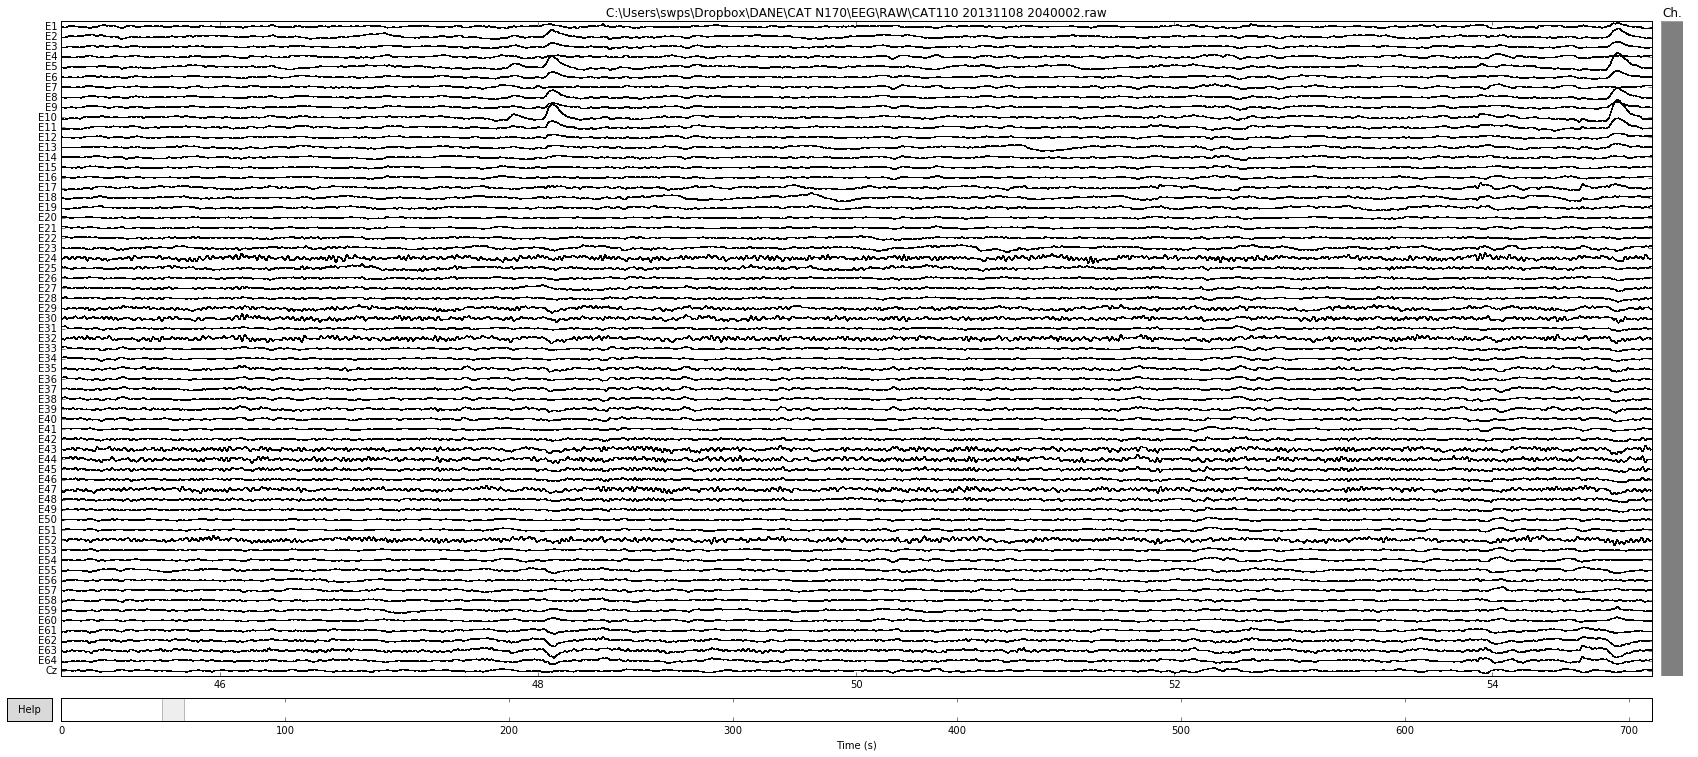

In [11]:
eeg.plot(n_channels=65, scalings={'eeg': 'auto'}, start=45.);

### Usuwanie przez annotacje

In [12]:
annot = mypy.events.mark_reject_peak2peak(eeg)
eeg.annotations = annot

    Rejecting  epoch based on EEG : ['E5', 'E7', 'E10']
Artifact detected in [250, 375]
    Rejecting  epoch based on EEG : ['E63']
Artifact detected in [7375, 7500]
    Rejecting  epoch based on EEG : ['E24']
Artifact detected in [7500, 7625]
    Rejecting  epoch based on EEG : ['E10']
Artifact detected in [7625, 7750]
    Rejecting  epoch based on EEG : ['E17']
Artifact detected in [31000, 31125]
    Rejecting  epoch based on EEG : ['E13', 'E18']
Artifact detected in [31125, 31250]
    Rejecting  epoch based on EEG : ['E62', 'E63']
Artifact detected in [31250, 31375]
    Rejecting  epoch based on EEG : ['E62']
Artifact detected in [31375, 31500]
    Rejecting  epoch based on EEG : ['E17']
Artifact detected in [42750, 42875]
    Rejecting  epoch based on EEG : ['E17']
Artifact detected in [42875, 43000]
    Rejecting  epoch based on EEG : ['E1', 'E17']
Artifact detected in [48875, 49000]
    Rejecting  epoch based on EEG : ['E1', 'E17']
Artifact detected in [60500, 60625]
    Rejectin

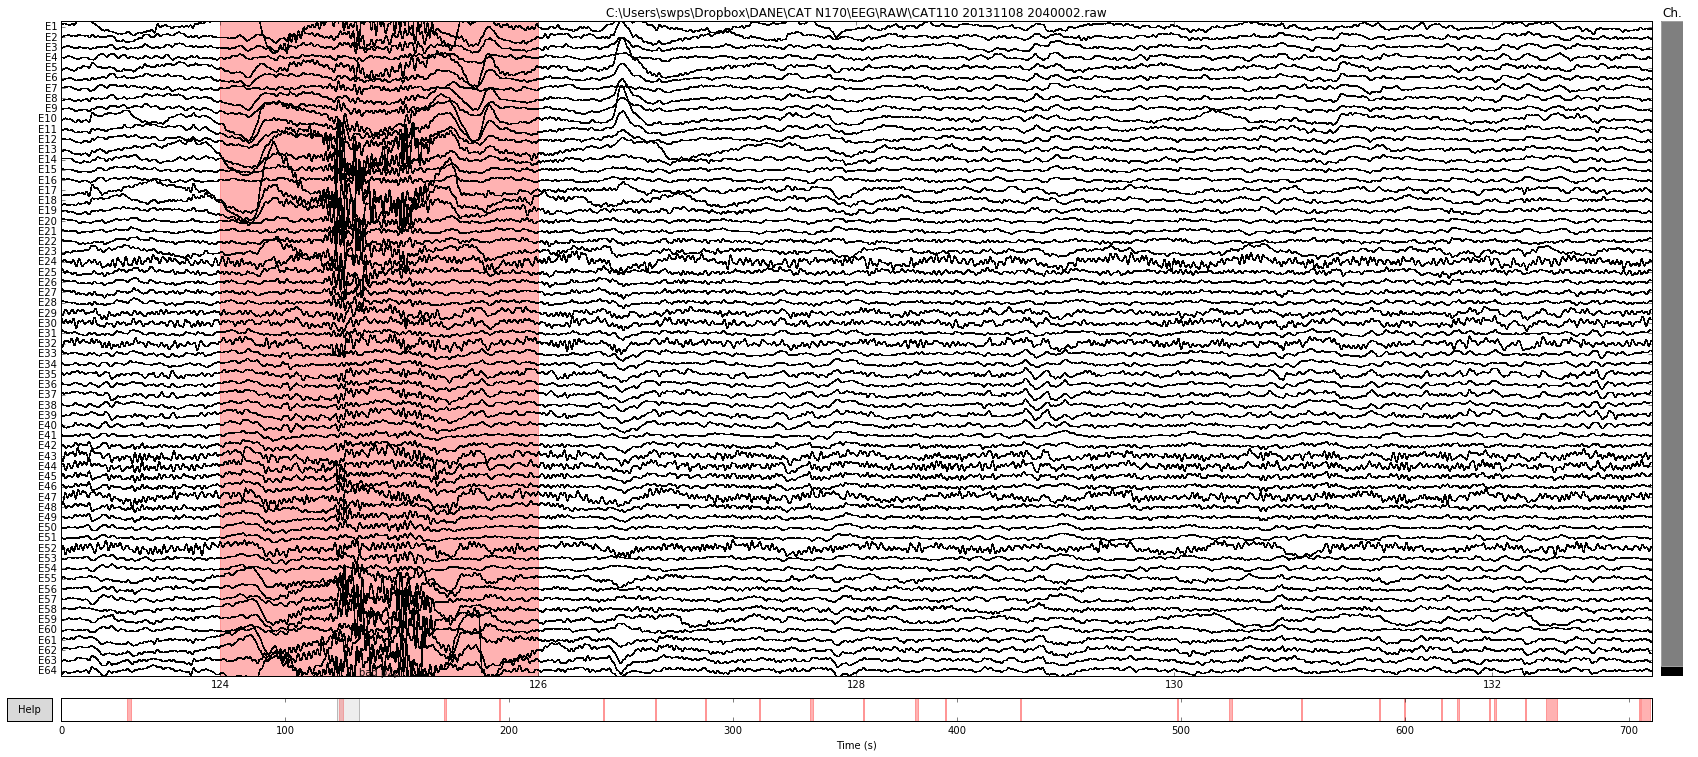

In [13]:
eeg.plot(n_channels=64, start=123.);

### Epokowanie
Przy epokowaniu opcja `reject_by_annotations` jest domyślnie włączona, więc epoki nachodzące na annotacje zawierające w swoim opisie "bad" zostaną usunięte (nasze annotacje mają automatycznie nazwę "bad p2p").

In [14]:
events_id = {'car/0': 36, 'car/90': 40, 'car/180': 44,
             'face/0': 52, 'face/90': 56, 'face/180': 60}
epochs = mne.Epochs(eeg, events, event_id=events_id, preload=True)

412 matching events found
Applying baseline correction (mode: mean)
add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 412 events and 176 original time points ...


<ipython-input-14-d8e3c294422c>:3: DeprecationWarning: add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
  epochs = mne.Epochs(eeg, events, event_id=events_id, preload=True)


7 bad epochs dropped


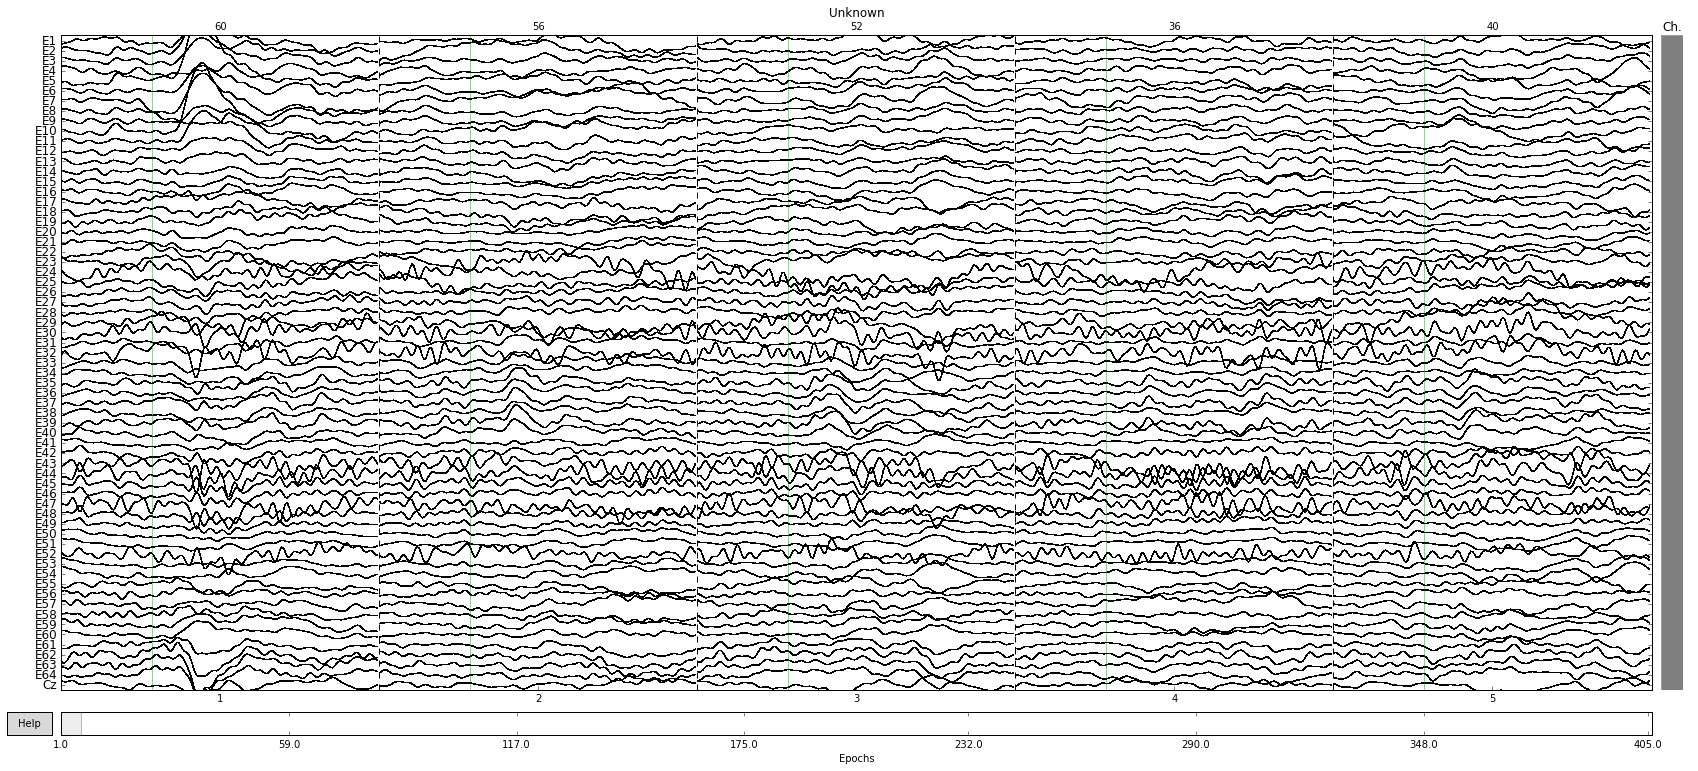

In [15]:
# możemy sami policzyć sobie skalę
n_epochs, n_channels, n_samples = epochs._data.shape
mean_sd = epochs._data.swapaxes(0, 1).reshape(
    n_channels, n_epochs * n_samples).std(axis=-1).mean()

epochs.plot(n_channels=65, n_epochs=5, scalings={'eeg': 6 * mean_sd});

In [19]:
# jeżeli potrzebna jest interpolacja:
# epochs.interpolate_bads(reset_bads=False)

Computing interpolation matrix from 64 sensor positions
Interpolating 1 sensors


<Epochs  |  n_events : 398 (all good), tmin : -0.2 (s), tmax : 0.5 (s), baseline : (None, 0), ~34.9 MB, data loaded,
 'car/0': 67, 'car/180': 64, 'car/90': 66, 'face/0': 67, 'face/180': 67, 'face/90': 67>

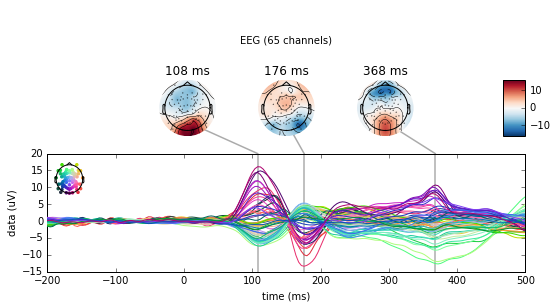

In [17]:
# tak tworzymy erpa i plotujemy go wraz z główkami:
epochs['face'].average().plot_joint();

Widać wyraźnie efekt mrugania, więc czas na ICA!

## ICA

In [18]:
from mne.preprocessing import ICA

ica = ICA(method='extended-infomax', n_components=0.98)
ica.fit(epochs)

Fitting ICA to data using 65 channels. 
Please be patient, this may take some time
Inferring max_pca_components from picks.
Selection by explained variance: 41 components
computing Extended Infomax ICA


<ICA  |  epochs decomposition, fit (extended-infomax): 71280 samples, 41 components, channels used: "eeg">

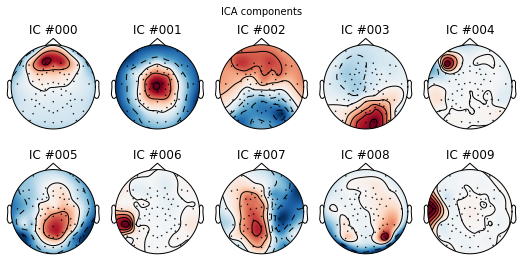

In [20]:
ica.plot_components(picks=list(range(10)));

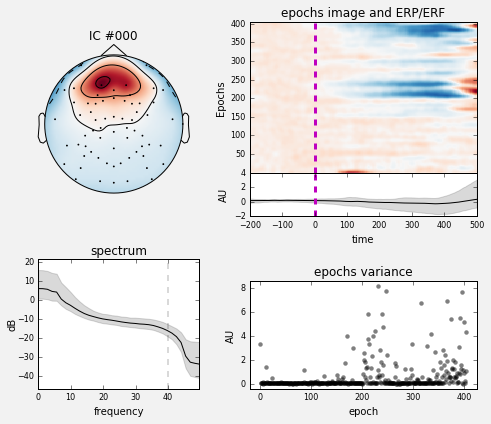

In [22]:
ica.plot_properties(epochs, picks=0, image_args={'sigma': 5});

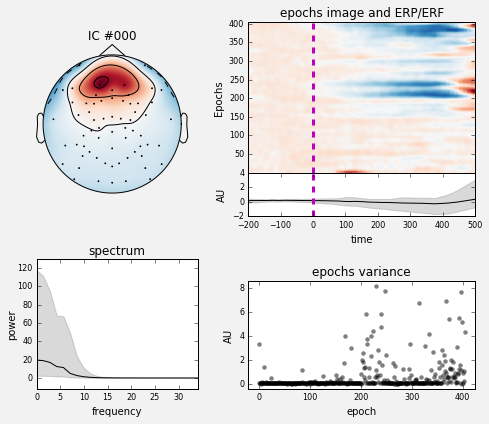

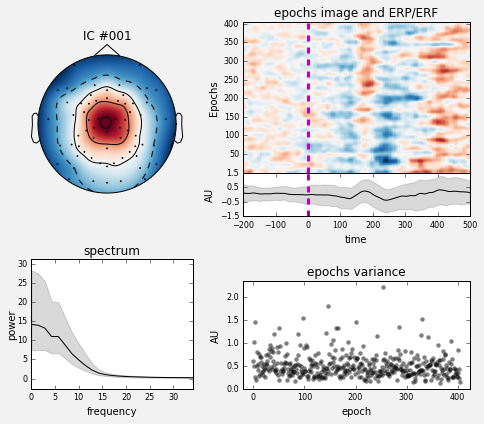

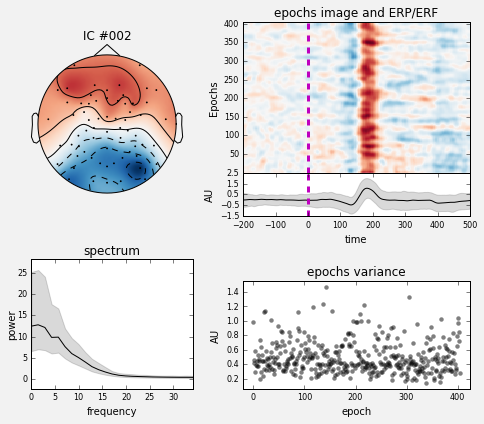

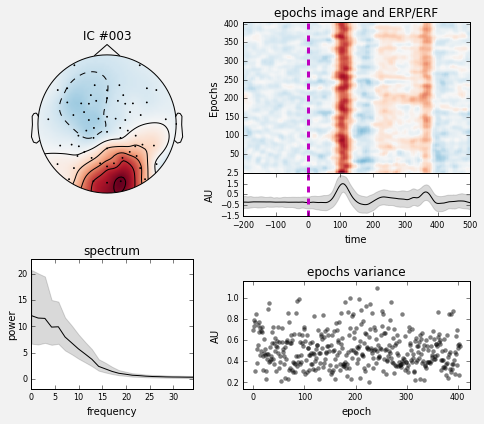

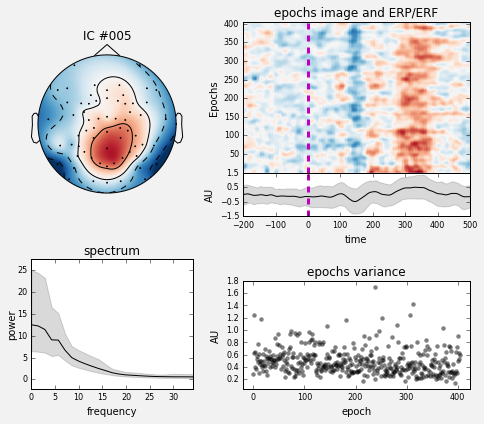

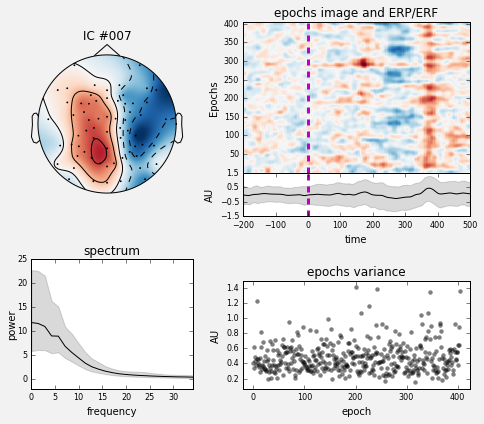

In [24]:
# przyda się nam obciąć trochę podgląd częstotliwości
# (zjeżdżalnia po filtrze nam zmienia skalę i trudniej
# dojrzeć coś sensownego w widmie)
ica.plot_properties(epochs, picks=[0, 1, 2, 3, 5, 7], dB=False,
                    image_args={'sigma': 5}, psd_args={'fmax': 35});

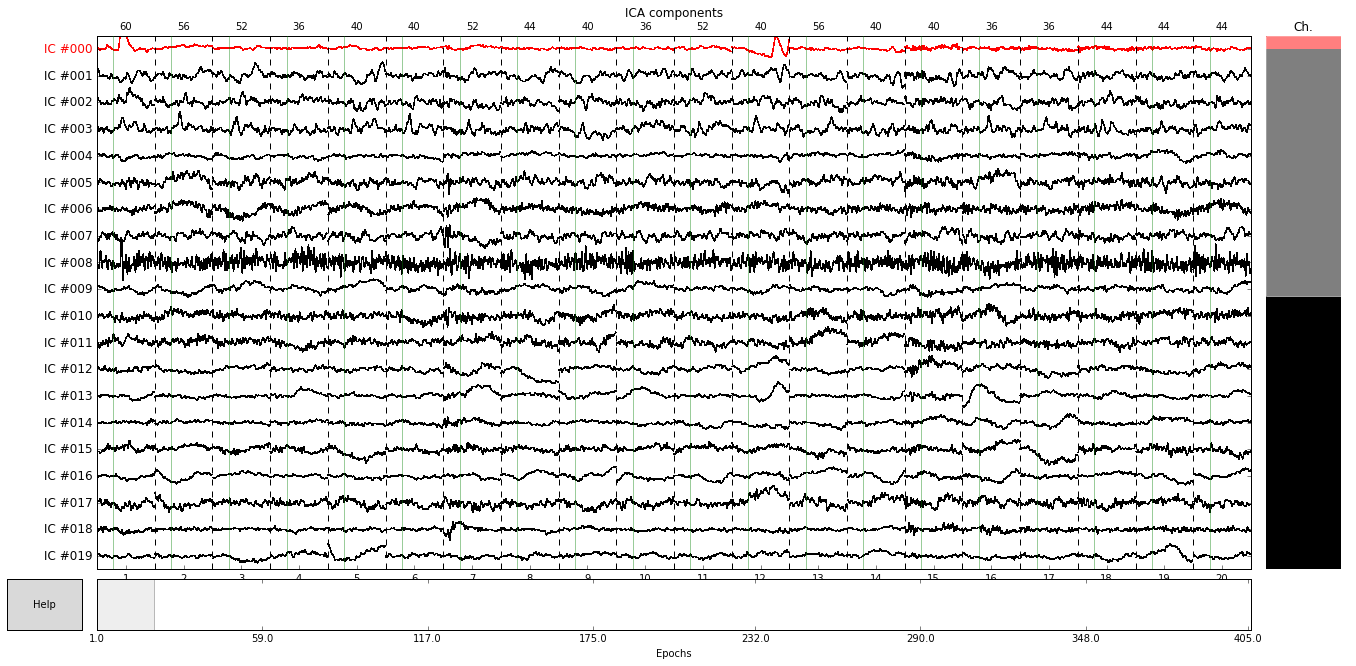

In [26]:
ica.exclude = [0]
ica.plot_sources(epochs);

Transforming to ICA space (41 components)
Zeroing out 1 ICA components


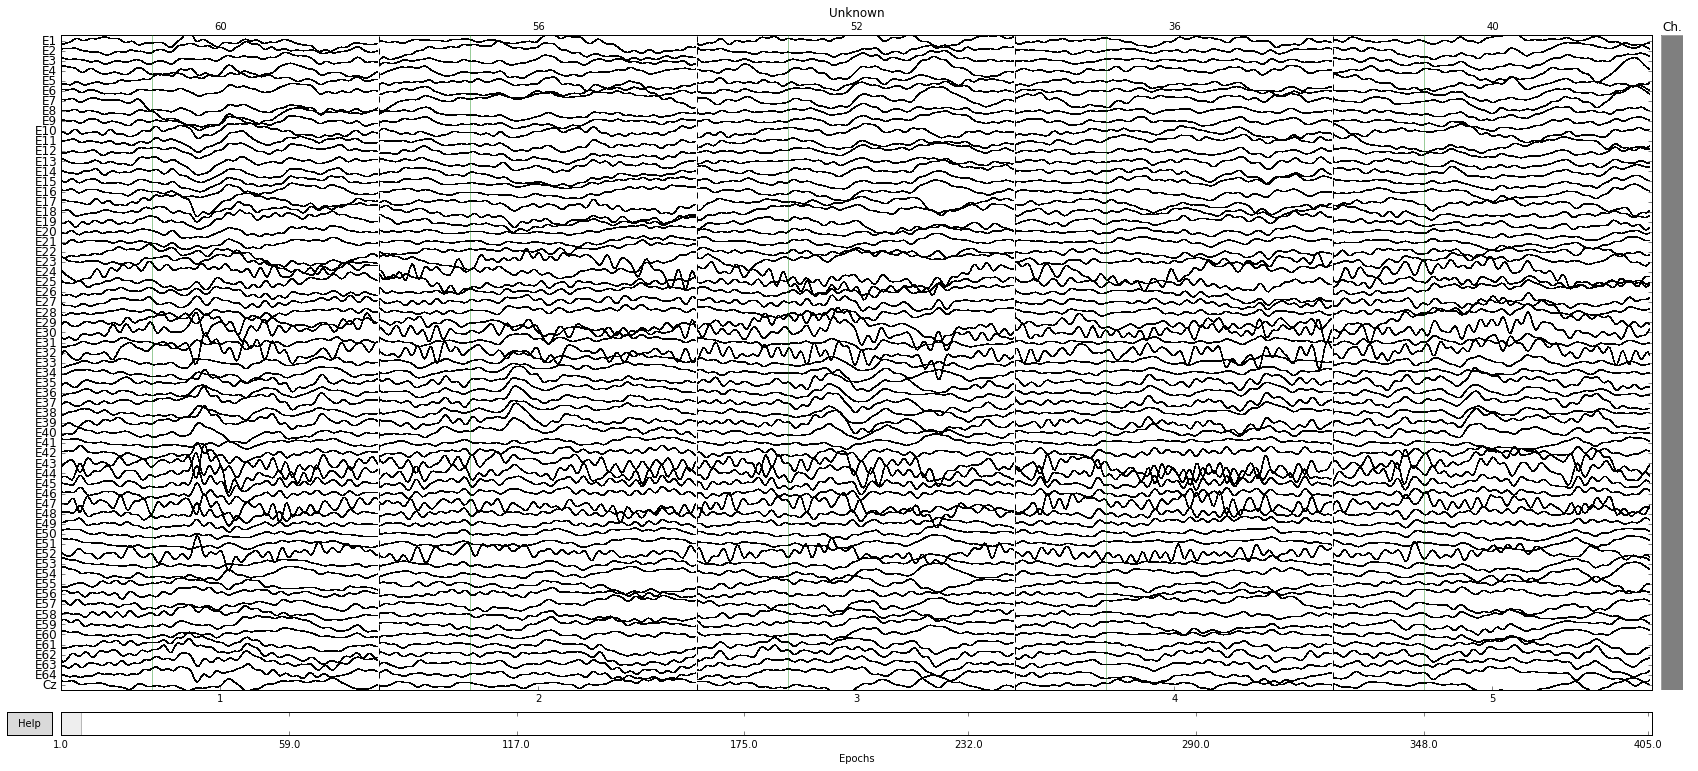

In [28]:
epochs_ica = ica.apply(epochs.copy())
epochs_ica.plot(n_channels=65, n_epochs=5, scalings={'eeg': 6 * mean_sd});

Transforming to ICA space (41 components)
Zeroing out 1 ICA components


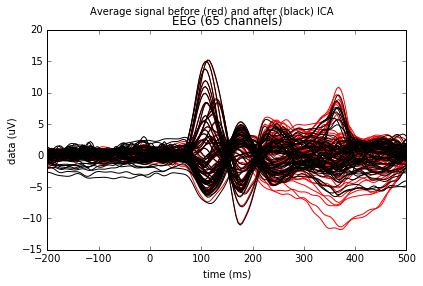

In [33]:
ica.plot_overlay(epochs['0'].average(), show=False); # patrzymy jak usunięcie kompo zmienia ERPa

`show=True` zrobiliśmy tylko dlatego że inaczej jupyter notebook
w trybie inline zbyt wcześnie przechwytuje wykres i plotuje go dwa
razy - raz niepoprawnie (przed ustawieniem kolorów linii i przed wy-
plotowaniem wszystkich linii) i raz poprawnie. Takie jego dziwactwo.